In [1]:
import pandas as pd
import numpy as np
import requests
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
response = requests.get(url)

In [3]:
if response.status_code == 200:
    with open("housing.csv", "wb") as f:
        f.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file.")


File downloaded successfully.


In [4]:
csv_file = "housing.csv"

In [5]:
df = pd.read_csv(csv_file)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
for col in df.columns:
    print("Column name:", col, end="\n")
    print("First five unique values:", df[col].unique()[:5], end="\n")
    print("Count of unique values:", df[col].nunique(), end="\n")
    print("Count of NULL values:", df[col].isnull().sum(), "\n")

Column name: longitude
First five unique values: [-122.23 -122.22 -122.24 -122.25 -122.26]
Count of unique values: 844
Count of NULL values: 0 

Column name: latitude
First five unique values: [37.88 37.86 37.85 37.84 37.83]
Count of unique values: 862
Count of NULL values: 0 

Column name: housing_median_age
First five unique values: [41. 21. 52. 42. 50.]
Count of unique values: 52
Count of NULL values: 0 

Column name: total_rooms
First five unique values: [ 880. 7099. 1467. 1274. 1627.]
Count of unique values: 5926
Count of NULL values: 0 

Column name: total_bedrooms
First five unique values: [ 129. 1106.  190.  235.  280.]
Count of unique values: 1923
Count of NULL values: 207 

Column name: population
First five unique values: [ 322. 2401.  496.  558.  565.]
Count of unique values: 3888
Count of NULL values: 0 

Column name: households
First five unique values: [ 126. 1138.  177.  219.  259.]
Count of unique values: 1815
Count of NULL values: 0 

Column name: median_income
First 

In [8]:
# Calculate mean, median, and standard deviation
mean_value = df['median_house_value'].mean()
median_value = df['median_house_value'].median()
std_deviation = df['median_house_value'].std()

print(f"Mean: {mean_value:,.2f}")
print(f"Median: {median_value:,.2f}")
print(f"Standard Deviation: {std_deviation:,.2f}")


Mean: 206,855.82
Median: 179,700.00
Standard Deviation: 115,395.62


In [9]:
# Calculate quartiles
q25 = df['median_house_value'].quantile(0.25)
q75 = df['median_house_value'].quantile(0.75)

print(f"25th Percentile (Q1): {q25}")
print(f"75th Percentile (Q3): {q75}")

# Calculate Interquartile Range (IQR)
iqr = q75 - q25
print(f"IQR: {iqr}")

# Identify potential outliers
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

potential_outliers = df[(df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)]
print("Potential Outliers:")
print(potential_outliers)


25th Percentile (Q1): 119600.0
75th Percentile (Q3): 264725.0
IQR: 145125.0
Lower Bound: -98087.5
Upper Bound: 482412.5
Potential Outliers:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
140      -122.18     37.81                30.0        292.0            38.0   
459      -122.25     37.87                52.0        609.0           236.0   
489      -122.25     37.86                48.0       2153.0           517.0   
493      -122.24     37.86                52.0       1668.0           225.0   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                35.0       1503.0           263.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20436    -118.69     34.21                10.0       3663.0           

c:\users\konutech\ml-zoomcamp\machine-learning-zoomcamp\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


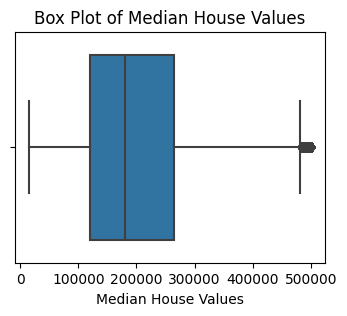

In [10]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='median_house_value')
plt.xlabel('Median House Values')
plt.title('Box Plot of Median House Values')
plt.show()


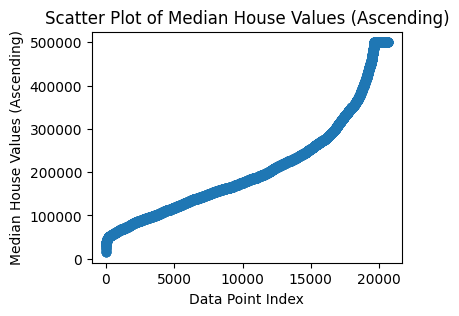

In [11]:
# Sort the DataFrame by the 'median_house_price' column in ascending order
df_sorted = df.sort_values(by='median_house_value')

# Create a scatter plot with the sorted values
plt.figure(figsize=(4, 3))
plt.scatter(x=range(len(df_sorted)), y=df_sorted['median_house_value'])
plt.xlabel('Data Point Index')
plt.ylabel('Median House Values (Ascending)')
plt.title('Scatter Plot of Median House Values (Ascending)')
plt.show()


c:\users\konutech\ml-zoomcamp\machine-learning-zoomcamp\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\konutech\ml-zoomcamp\machine-learning-zoomcamp\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


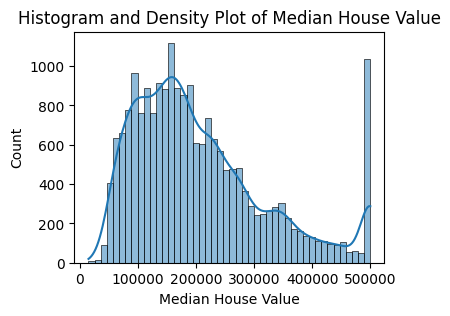

In [12]:
plt.figure(figsize=(4, 3))
sns.histplot(df['median_house_value'], kde=True)
plt.xlabel('Median House Value')
plt.title('Histogram and Density Plot of Median House Value')
plt.show()


<Figure size 400x300 with 0 Axes>

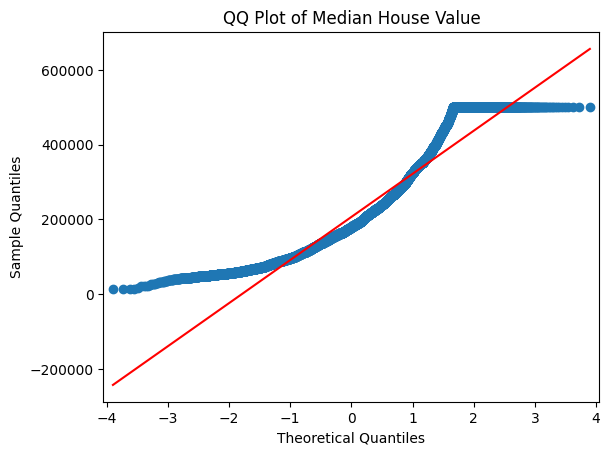

In [13]:
plt.figure(figsize=(4, 3))
sm.qqplot(df['median_house_value'], line='s')
plt.title('QQ Plot of Median House Value')
plt.show()


In [14]:
len(df["ocean_proximity"].unique())

5

In [15]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
filter_categories = ["<1H OCEAN", "INLAND"]
df_filtered = df[df["ocean_proximity"].isin(filter_categories)]
df_filtered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
# Drop the 'ocean_proximity' column from the DataFrame
df_filtered_subset = df_filtered.drop(columns=['ocean_proximity'])
df_filtered_subset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [18]:
df_filtered_subset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [19]:
df_filtered_subset['population'].median()

1195.0